# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
!pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create empty lists to hold the varibles for our Lat and Long received from our API calls
lat = []
long = []

# Establish our base url to allow us to make API calls
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&q="

# Create a for loop that will get the lat & long data needed and in our loop... 
# ... we will use a try & except method to append the data to our list
search_url = f"{base_url}{city}&appid={weather_api_key}"
i=1
for city in cities:
    response = requests.get(f"{base_url}{city}&appid={weather_api_key}")
    try:
        lat.append(response.json()["coord"]["lat"])
        long.append(response.json()["coord"]["lon"])
        print(f"Processing record {i}|{city}")
        i+=1
    except:
        print(city + " can't be found")
    


Processing record 1|punta arenas
Processing record 2|hilo
Processing record 3|chokurdakh
Processing record 4|naze
Processing record 5|silvassa
Processing record 6|lasa
Processing record 7|busselton
Processing record 8|port alfred
Processing record 9|kawalu
amderma can't be found
Processing record 10|barinas
Processing record 11|yulara
Processing record 12|kodiak
Processing record 13|rikitea
Processing record 14|srednekolymsk
Processing record 15|castro
Processing record 16|broome
Processing record 17|paamiut
Processing record 18|dikson
Processing record 19|ulagan
Processing record 20|barranca
Processing record 21|bahia blanca
Processing record 22|kaitangata
Processing record 23|vao
Processing record 24|saldanha
rawannawi can't be found
Processing record 25|tamandare
Processing record 26|lekoni
Processing record 27|chulman
Processing record 28|nanortalik
Processing record 29|cabo san lucas
Processing record 30|albany
Processing record 31|mataura
Processing record 32|oistins
Processing r

Processing record 252|san pedro
Processing record 253|mineral wells
Processing record 254|kavieng
Processing record 255|fuzhou
Processing record 256|inta
Processing record 257|mezen
Processing record 258|quatre cocos
Processing record 259|celestun
Processing record 260|ahipara
Processing record 261|turukhansk
barentsburg can't be found
samusu can't be found
Processing record 262|maceio
Processing record 263|hlukhiv
Processing record 264|victoria
Processing record 265|grand-lahou
Processing record 266|qeshm
Processing record 267|axim
Processing record 268|gamba
Processing record 269|almasfuzito
Processing record 270|kisangani
Processing record 271|hami
Processing record 272|markapur
vaitupu can't be found
Processing record 273|tari
Processing record 274|abasolo
Processing record 275|arraial do cabo
Processing record 276|half moon bay
Processing record 277|disraeli
Processing record 278|panaba
Processing record 279|mehamn
Processing record 280|neepawa
Processing record 281|wasco
Processi

Processing record 493|nhulunbuy
Processing record 494|upata
Processing record 495|sosnovo-ozerskoye
Processing record 496|sovetskiy
Processing record 497|bathsheba
Processing record 498|holt
Processing record 499|hamilton
Processing record 500|guarapari
Processing record 501|lobito
Processing record 502|sibu
Processing record 503|xai-xai
Processing record 504|kajaani
Processing record 505|maragogi
Processing record 506|coquimbo
Processing record 507|rio de jesus
samalaeulu can't be found
Processing record 508|wilmington
Processing record 509|ayan
Processing record 510|griffith
Processing record 511|southbridge
Processing record 512|nouakchott
Processing record 513|jaltocan
Processing record 514|shimoda
Processing record 515|fairbanks
Processing record 516|ternate
Processing record 517|little current
Processing record 518|coldingham
Processing record 519|primalkinskoye
Processing record 520|matamoros
Processing record 521|los llanos de aridane
Processing record 522|zhezkazgan
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create empty lists to hold the varibles received from our API calls
max_temp=[]
humidity=[]
wind_speed=[]
country=[]
date=[]
cityArr=[]
cloudiness=[]

# Establish our base url to allow us to make API calls
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&q="

# Establish the search url that will make the API calls using our variables
search_url = f"{base_url}{city}&appid={weather_api_key}"

# Create a for loop that will get the weather data needed in our for loop... 
# ... we will use a try & except method to append the data to our list  
for city in cities:
    response = requests.get(f"{base_url}{city}&appid={weather_api_key}")
    try:
        max_temp.append(response.json()["main"]["temp_max"])
        humidity.append(response.json()["main"]["humidity"])
        wind_speed.append(response.json()["wind"]["speed"])
        country.append(response.json()["sys"]["country"])
        date.append(response.json()["dt"])
        cityArr.append(response.json()["name"])
        cloudiness.append(response.json()["clouds"]["all"])
# The except loop will provide us with a message when there is no information
    except:
        print(city + " can't be found")
    print(response.json())

{'coord': {'lon': -70.9167, 'lat': -53.15}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 53.29, 'feels_like': 39.85, 'temp_min': 53.01, 'temp_max': 53.6, 'pressure': 1006, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 20.71, 'deg': 270}, 'clouds': {'all': 0}, 'dt': 1612131483, 'sys': {'type': 1, 'id': 8487, 'country': 'CL', 'sunrise': 1612084360, 'sunset': 1612140091}, 'timezone': -10800, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}
{'coord': {'lon': -155.09, 'lat': 19.7297}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 74.7, 'feels_like': 74.8, 'temp_min': 71.01, 'temp_max': 78.8, 'pressure': 1017, 'humidity': 57}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 30}, 'clouds': {'all': 20}, 'dt': 1612131479, 'sys': {'type': 1, 'id': 7881, 'country': 'US', 'sunrise': 1612112136, 'sunset': 1612152722}, 'timezone'

{'coord': {'lon': 80.5464, 'lat': 73.5069}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -26.72, 'feels_like': -38.67, 'temp_min': -26.72, 'temp_max': -26.72, 'pressure': 1035, 'humidity': 78, 'sea_level': 1035, 'grnd_level': 1028}, 'visibility': 10000, 'wind': {'speed': 8.77, 'deg': 111}, 'clouds': {'all': 63}, 'dt': 1612131474, 'sys': {'country': 'RU', 'sunrise': 1612159963, 'sunset': 1612164597}, 'timezone': 25200, 'id': 1507390, 'name': 'Dikson', 'cod': 200}
{'coord': {'lon': 87.9563, 'lat': 50.6321}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 4.86, 'feels_like': -2.56, 'temp_min': 4.86, 'temp_max': 4.86, 'pressure': 1028, 'humidity': 75, 'sea_level': 1028, 'grnd_level': 877}, 'visibility': 10000, 'wind': {'speed': 1.88, 'deg': 153}, 'clouds': {'all': 47}, 'dt': 1612131792, 'sys': {'country': 'RU', 'sunrise': 1612

{'coord': {'lon': 73, 'lat': 5.6667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 81.64, 'feels_like': 85.42, 'temp_min': 81.64, 'temp_max': 81.64, 'pressure': 1010, 'humidity': 72, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 8.41, 'deg': 26}, 'clouds': {'all': 36}, 'dt': 1612131796, 'sys': {'country': 'MV', 'sunrise': 1612142701, 'sunset': 1612185481}, 'timezone': 18000, 'id': 1337619, 'name': 'Ugoofaaru', 'cod': 200}
{'coord': {'lon': -17.1, 'lat': 32.6667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 54.61, 'feels_like': 52.2, 'temp_min': 50, 'temp_max': 57, 'pressure': 1025, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 41, 'gust': 3}, 'clouds': {'all': 0}, 'dt': 1612131510, 'sys': {'type': 3, 'id': 2008291, 'country': 'PT', 'sunrise': 1612080222, 'sunset': 1612118

{'coord': {'lon': 147.0587, 'lat': -42.7826}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 65.41, 'feels_like': 63.81, 'temp_min': 63, 'temp_max': 68, 'pressure': 1012, 'humidity': 53}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 351, 'gust': 5.01}, 'clouds': {'all': 7}, 'dt': 1612131476, 'sys': {'type': 3, 'id': 2031307, 'country': 'AU', 'sunrise': 1612120434, 'sunset': 1612172197}, 'timezone': 39600, 'id': 2155415, 'name': 'New Norfolk', 'cod': 200}
{'coord': {'lon': -103.8522, 'lat': 44.6714}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 47.14, 'feels_like': 37.54, 'temp_min': 46.4, 'temp_max': 48, 'pressure': 1024, 'humidity': 29}, 'visibility': 10000, 'wind': {'speed': 7.61, 'deg': 247}, 'clouds': {'all': 1}, 'dt': 1612131801, 'sys': {'type': 1, 'id': 5898, 'country': 'US', 'sunrise': 1612102512, 'sunset': 1612137750}, 

{'coord': {'lon': -120.4579, 'lat': 34.6391}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 62.1, 'feels_like': 56.57, 'temp_min': 59, 'temp_max': 64.4, 'pressure': 1019, 'humidity': 32}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 0}, 'clouds': {'all': 1}, 'dt': 1612131487, 'sys': {'type': 1, 'id': 4747, 'country': 'US', 'sunrise': 1612105227, 'sunset': 1612143007}, 'timezone': -28800, 'id': 5367788, 'name': 'Lompoc', 'cod': 200}
{'coord': {'lon': -79.5197, 'lat': 8.9936}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 87.42, 'feels_like': 86.9, 'temp_min': 86, 'temp_max': 88, 'pressure': 1006, 'humidity': 55}, 'visibility': 9000, 'wind': {'speed': 13.8, 'deg': 350}, 'clouds': {'all': 20}, 'dt': 1612131805, 'sys': {'type': 1, 'id': 7190, 'country': 'PA', 'sunrise': 1612093156, 'sunset': 1612135425}, 'timezone': -18000, 'id':

{'coord': {'lon': 79.7825, 'lat': 51.6753}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 4.06, 'feels_like': -4.77, 'temp_min': 4.06, 'temp_max': 4.06, 'pressure': 1025, 'humidity': 93, 'sea_level': 1025, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 100}, 'clouds': {'all': 100}, 'dt': 1612131671, 'sys': {'country': 'RU', 'sunrise': 1612145998, 'sunset': 1612178928}, 'timezone': 25200, 'id': 1499779, 'name': 'Malinovoye Ozero', 'cod': 200}
{'coord': {'lon': 50.2788, 'lat': -14.9003}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 76.1, 'feels_like': 80.83, 'temp_min': 76.1, 'temp_max': 76.1, 'pressure': 1013, 'humidity': 82, 'sea_level': 1013, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 5.32, 'deg': 211}, 'clouds': {'all': 23}, 'dt': 1612131587, 'sys': {'country': 'MG', 'sunrise': 161

{'coord': {'lon': 137.7667, 'lat': -32.5}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 69.8, 'feels_like': 64.36, 'temp_min': 69.8, 'temp_max': 69.8, 'pressure': 1014, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 17.27, 'deg': 190}, 'rain': {'1h': 0.27}, 'clouds': {'all': 90}, 'dt': 1612131813, 'sys': {'type': 1, 'id': 9613, 'country': 'AU', 'sunrise': 1612123972, 'sunset': 1612173119}, 'timezone': 37800, 'id': 2063056, 'name': 'Port Augusta', 'cod': 200}
{'coord': {'lon': -76.2167, 'lat': -13.7}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 72.79, 'feels_like': 64.99, 'temp_min': 72, 'temp_max': 73.4, 'pressure': 1007, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 19.57, 'deg': 220}, 'clouds': {'all': 40}, 'dt': 1612131501, 'sys': {'type': 1, 'id': 8691, 'country': 'PE', 'sunrise': 1612090640, 'sunset'

{'coord': {'lon': -106.0806, 'lat': 35.9911}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 41.97, 'feels_like': 35.13, 'temp_min': 41, 'temp_max': 44.01, 'pressure': 1029, 'humidity': 30}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 21}, 'clouds': {'all': 1}, 'dt': 1612131819, 'sys': {'type': 1, 'id': 4660, 'country': 'US', 'sunrise': 1612101928, 'sunset': 1612139404}, 'timezone': -25200, 'id': 5467024, 'name': 'Española', 'cod': 200}
{'coord': {'lon': 38.0106, 'lat': -1.367}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 65.05, 'feels_like': 61.57, 'temp_min': 65.05, 'temp_max': 65.05, 'pressure': 1014, 'humidity': 57, 'sea_level': 1014, 'grnd_level': 887}, 'visibility': 10000, 'wind': {'speed': 6.04, 'deg': 339}, 'clouds': {'all': 78}, 'dt': 1612131819, 'sys': {'country': 'KE', 'sunrise': 1612150580, 'sunset': 16121943

{'coord': {'lon': 31.1107, 'lat': 70.3705}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 18.5, 'feels_like': 7.88, 'temp_min': 15.8, 'temp_max': 21.2, 'pressure': 994, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 40}, 'clouds': {'all': 75}, 'dt': 1612131564, 'sys': {'type': 1, 'id': 1682, 'country': 'NO', 'sunrise': 1612079615, 'sunset': 1612095858}, 'timezone': 3600, 'id': 777019, 'name': 'Vardø', 'cod': 200}
{'coord': {'lon': -66.8958, 'lat': -4.8828}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.53, 'feels_like': 91.87, 'temp_min': 80.53, 'temp_max': 80.53, 'pressure': 1006, 'humidity': 92, 'sea_level': 1006, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 220}, 'clouds': {'all': 73}, 'dt': 1612131823, 'sys': {'country': 'BR', 'sunrise': 1612089086, 'sunset': 1612133435}

{'coord': {'lon': -115.7999, 'lat': 60.8156}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -5.8, 'feels_like': -17.66, 'temp_min': -5.8, 'temp_max': -5.8, 'pressure': 1028, 'humidity': 77}, 'visibility': 3185, 'wind': {'speed': 9.22, 'deg': 310}, 'clouds': {'all': 100}, 'dt': 1612131827, 'sys': {'type': 1, 'id': 1036, 'country': 'CA', 'sunrise': 1612108986, 'sunset': 1612137011}, 'timezone': -25200, 'id': 5972762, 'name': 'Hay River', 'cod': 200}
{'coord': {'lon': 158.6167, 'lat': 54.7167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 9.05, 'feels_like': -0.31, 'temp_min': 9.05, 'temp_max': 9.05, 'pressure': 985, 'humidity': 94, 'sea_level': 985, 'grnd_level': 964}, 'visibility': 448, 'wind': {'speed': 6.11, 'deg': 218}, 'clouds': {'all': 100}, 'dt': 1612131827, 'sys': {'country': 'RU', 'sunrise': 1612127754, 'sunset':

{'coord': {'lon': 48.1664, 'lat': 30.4397}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 48.2, 'feels_like': 45.21, 'temp_min': 48.2, 'temp_max': 48.2, 'pressure': 1022, 'humidity': 81}, 'visibility': 8000, 'wind': {'speed': 2.3, 'deg': 220}, 'clouds': {'all': 0}, 'dt': 1612131555, 'sys': {'type': 1, 'id': 7439, 'country': 'IR', 'sunrise': 1612150702, 'sunset': 1612189401}, 'timezone': 12600, 'id': 127319, 'name': 'Khorramshahr', 'cod': 200}
{'coord': {'lon': 7.6006, 'lat': 12.9894}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 70.81, 'feels_like': 62.19, 'temp_min': 70.81, 'temp_max': 70.81, 'pressure': 1013, 'humidity': 21, 'sea_level': 1013, 'grnd_level': 954}, 'visibility': 10000, 'wind': {'speed': 8.21, 'deg': 36}, 'clouds': {'all': 0}, 'dt': 1612131582, 'sys': {'country': 'NG', 'sunrise': 1612072555, 'sunset': 1612114203}, 'ti

{'coord': {'lon': 68.7617, 'lat': 27.5295}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 53.6, 'feels_like': 50.74, 'temp_min': 53.6, 'temp_max': 53.6, 'pressure': 1012, 'humidity': 76}, 'visibility': 2000, 'wind': {'speed': 3.53, 'deg': 65}, 'clouds': {'all': 0}, 'dt': 1612131836, 'sys': {'type': 1, 'id': 7591, 'country': 'PK', 'sunrise': 1612145484, 'sunset': 1612184733}, 'timezone': 18000, 'id': 1162004, 'name': 'Khairpur', 'cod': 200}
{'coord': {'lon': 38.2291, 'lat': 40.9372}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 42.8, 'feels_like': 37.18, 'temp_min': 42.8, 'temp_max': 42.8, 'pressure': 1015, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 230}, 'clouds': {'all': 0}, 'dt': 1612131836, 'sys': {'type': 1, 'id': 6990, 'country': 'TR', 'sunrise': 1612154259, 'sunset': 1612190615}, 'timezone': 10800, 'id': 750

{'coord': {'lon': 166.4372, 'lat': 68.0546}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -15.56, 'feels_like': -27.2, 'temp_min': -15.56, 'temp_max': -15.56, 'pressure': 1026, 'humidity': 81, 'sea_level': 1026, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 8.5, 'deg': 46}, 'clouds': {'all': 90}, 'dt': 1612131840, 'sys': {'country': 'RU', 'sunrise': 1612131243, 'sunset': 1612152085}, 'timezone': 43200, 'id': 2126682, 'name': 'Bilibino', 'cod': 200}
{'coord': {'lon': 45.2699, 'lat': -12.7887}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 90.07, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1012, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 30}, 'clouds': {'all': 75}, 'dt': 1612131841, 'sys': {'type': 1, 'id': 2131, 'country': 'YT', 'sunrise': 1612147973, 'sunset':

artyk can't be found
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 149.5871, 'lat': -32.5943}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 71.76, 'feels_like': 71.53, 'temp_min': 71.6, 'temp_max': 72, 'pressure': 1016, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 90}, 'clouds': {'all': 75}, 'dt': 1612131845, 'sys': {'type': 1, 'id': 9547, 'country': 'AU', 'sunrise': 1612121123, 'sunset': 1612170294}, 'timezone': 39600, 'id': 2156404, 'name': 'Mudgee', 'cod': 200}
{'coord': {'lon': -15.2082, 'lat': 64.2539}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 26.62, 'feels_like': 15.93, 'temp_min': 26.62, 'temp_max': 26.62, 'pressure': 1012, 'humidity': 84, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 10.54, 'deg': 17}, 'clouds': {'all': 20}, 'dt': 1612131515,

{'coord': {'lon': 118.175, 'lat': 29.6008}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 55, 'feels_like': 55.09, 'temp_min': 55, 'temp_max': 55, 'pressure': 983, 'humidity': 90}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 114}, 'rain': {'1h': 0.52}, 'clouds': {'all': 100}, 'dt': 1612131729, 'sys': {'type': 3, 'id': 2000633, 'country': 'CN', 'sunrise': 1612133825, 'sunset': 1612172671}, 'timezone': 28800, 'id': 1791347, 'name': 'Wucheng', 'cod': 200}
{'coord': {'lon': 17.691, 'lat': -14.6585}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 64.9, 'feels_like': 68.05, 'temp_min': 64.9, 'temp_max': 64.9, 'pressure': 1012, 'humidity': 95, 'sea_level': 1012, 'grnd_level': 865}, 'visibility': 5454, 'wind': {'speed': 2.62, 'deg': 270}, 'rain': {'1h': 2.01}, 'clouds': {'all': 100}, 'dt': 1612131607, 'sys': {'country': 'AO', 'sunri

{'coord': {'lon': -121.3011, 'lat': 37.9333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 63.88, 'feels_like': 57.54, 'temp_min': 63, 'temp_max': 64.4, 'pressure': 1019, 'humidity': 45}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 130}, 'clouds': {'all': 1}, 'dt': 1612131853, 'sys': {'type': 1, 'id': 5789, 'country': 'US', 'sunrise': 1612105804, 'sunset': 1612142835}, 'timezone': -28800, 'id': 5392126, 'name': 'San Joaquin', 'cod': 200}
{'coord': {'lon': -135.33, 'lat': 57.0531}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 41, 'feels_like': 33.26, 'temp_min': 41, 'temp_max': 41, 'pressure': 1007, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 320}, 'clouds': {'all': 40}, 'dt': 1612131843, 'sys': {'type': 1, 'id': 7795, 'country': 'US', 'sunrise': 1612112509, 'sunset': 1612142864}, 'timezone': 

{'coord': {'lon': 121.0167, 'lat': 14.35}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 73.81, 'feels_like': 76.08, 'temp_min': 73.4, 'temp_max': 73.99, 'pressure': 1015, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 10}, 'clouds': {'all': 75}, 'dt': 1612131857, 'sys': {'type': 1, 'id': 8160, 'country': 'PH', 'sunrise': 1612131836, 'sunset': 1612173296}, 'timezone': 28800, 'id': 1688781, 'name': 'City of San Pedro', 'cod': 200}
{'coord': {'lon': -98.1128, 'lat': 32.8085}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 55.76, 'feels_like': 43.18, 'temp_min': 55, 'temp_max': 57, 'pressure': 1026, 'humidity': 41}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 320}, 'clouds': {'all': 1}, 'dt': 1612131586, 'sys': {'type': 1, 'id': 5010, 'country': 'US', 'sunrise': 1612099671, 'sunset': 1612137836}, 'timez

{'coord': {'lon': 10, 'lat': -2.65}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 78.46, 'feels_like': 86.92, 'temp_min': 78.46, 'temp_max': 78.46, 'pressure': 1012, 'humidity': 86, 'sea_level': 1012, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 242}, 'rain': {'1h': 1.4}, 'clouds': {'all': 100}, 'dt': 1612132114, 'sys': {'country': 'GA', 'sunrise': 1612070796, 'sunset': 1612114811}, 'timezone': 3600, 'id': 2400547, 'name': 'Gamba', 'cod': 200}
{'coord': {'lon': 18.2615, 'lat': 47.7275}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.78, 'feels_like': 21.94, 'temp_min': 27, 'temp_max': 30.99, 'pressure': 1003, 'humidity': 93}, 'visibility': 8000, 'wind': {'speed': 4.61, 'deg': 20}, 'clouds': {'all': 82}, 'dt': 1612131861, 'sys': {'type': 1, 'id': 6670, 'country': 'HU', 'sunrise': 1612073712, 'suns

{'coord': {'lon': -121.9166, 'lat': 36.6177}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 56.55, 'feels_like': 52.95, 'temp_min': 55, 'temp_max': 57.99, 'pressure': 1020, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 20}, 'clouds': {'all': 1}, 'dt': 1612131462, 'sys': {'type': 1, 'id': 4980, 'country': 'US', 'sunrise': 1612105798, 'sunset': 1612143136}, 'timezone': -28800, 'id': 5380437, 'name': 'Pacific Grove', 'cod': 200}
{'coord': {'lon': -68.5364, 'lat': -31.5375}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 70.97, 'feels_like': 57.72, 'temp_min': 70.97, 'temp_max': 70.97, 'pressure': 1012, 'humidity': 45, 'sea_level': 1012, 'grnd_level': 940}, 'visibility': 10000, 'wind': {'speed': 22.97, 'deg': 176}, 'clouds': {'all': 69}, 'dt': 1612131521, 'sys': {'country': 'AR', 'sunrise': 1612087165, 'sunset':

{'coord': {'lon': 118.9636, 'lat': 42.2683}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 1.27, 'feels_like': -10.82, 'temp_min': 1.27, 'temp_max': 1.27, 'pressure': 1024, 'humidity': 82, 'sea_level': 1024, 'grnd_level': 950}, 'visibility': 10000, 'wind': {'speed': 10.07, 'deg': 306}, 'clouds': {'all': 0}, 'dt': 1612131533, 'sys': {'country': 'CN', 'sunrise': 1612135071, 'sunset': 1612171046}, 'timezone': 28800, 'id': 2038067, 'name': 'Chifeng', 'cod': 200}
{'coord': {'lon': 118.8686, 'lat': 28.9594}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55.09, 'feels_like': 54.45, 'temp_min': 55.09, 'temp_max': 55.09, 'pressure': 1020, 'humidity': 84, 'sea_level': 1020, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 1.48, 'deg': 9}, 'clouds': {'all': 90}, 'dt': 1612131868, 'sys': {'country': 'CN', 'sunrise': 1612133597, 

{'coord': {'lon': -81.2354, 'lat': 32.296}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 61.83, 'feels_like': 57.99, 'temp_min': 61, 'temp_max': 62.6, 'pressure': 1009, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 190}, 'rain': {'1h': 0.16}, 'clouds': {'all': 90}, 'dt': 1612131698, 'sys': {'type': 1, 'id': 5775, 'country': 'US', 'sunrise': 1612095569, 'sunset': 1612133836}, 'timezone': -18000, 'id': 4218882, 'name': 'Rincon', 'cod': 200}
{'coord': {'lon': -58.6502, 'lat': 51.226}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.56, 'feels_like': 5.02, 'temp_min': 17.56, 'temp_max': 17.56, 'pressure': 1020, 'humidity': 91, 'sea_level': 1020, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 12.71, 'deg': 333}, 'clouds': {'all': 100}, 'dt': 1612131532, 'sys': {'country': 'CA', 'sunrise': 16120

{'coord': {'lon': -151.5483, 'lat': 59.6425}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 18.45, 'feels_like': 8.01, 'temp_min': 16, 'temp_max': 21.2, 'pressure': 1018, 'humidity': 63}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 70}, 'clouds': {'all': 1}, 'dt': 1612131876, 'sys': {'type': 1, 'id': 7709, 'country': 'US', 'sunrise': 1612117157, 'sunset': 1612146001}, 'timezone': -32400, 'id': 5864145, 'name': 'Homer', 'cod': 200}
{'coord': {'lon': 140.3333, 'lat': -8.4667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 76.82, 'feels_like': 81.77, 'temp_min': 76.82, 'temp_max': 76.82, 'pressure': 1008, 'humidity': 93, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 7664, 'wind': {'speed': 9.22, 'deg': 326}, 'clouds': {'all': 100}, 'dt': 1612131575, 'sys': {'country': 'ID', 'sunrise': 1612125486, 'sunset': 16121703

{'coord': {'lon': 55.4781, 'lat': -21.3393}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 76.93, 'feels_like': 72.27, 'temp_min': 73, 'temp_max': 80.6, 'pressure': 1013, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 18.41, 'deg': 130}, 'clouds': {'all': 20}, 'dt': 1612131879, 'sys': {'type': 1, 'id': 2127, 'country': 'RE', 'sunrise': 1612144816, 'sunset': 1612191777}, 'timezone': 14400, 'id': 935214, 'name': 'Saint-Pierre', 'cod': 200}
burica can't be found
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 170.3133, 'lat': 69.7008}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -27.27, 'feels_like': -35.95, 'temp_min': -27.27, 'temp_max': -27.27, 'pressure': 1033, 'humidity': 85, 'sea_level': 1033, 'grnd_level': 1026}, 'visibility': 10000, 'wind': {'speed': 2.95, 'deg': 257}, 'clouds': {'all': 85}, 'dt'

{'coord': {'lon': 125.5072, 'lat': 12.1791}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 79.21, 'feels_like': 79.68, 'temp_min': 79.21, 'temp_max': 79.21, 'pressure': 1012, 'humidity': 81, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 15.41, 'deg': 49}, 'clouds': {'all': 99}, 'dt': 1612131883, 'sys': {'country': 'PH', 'sunrise': 1612130590, 'sunset': 1612172386}, 'timezone': 28800, 'id': 1688696, 'name': 'San Policarpo', 'cod': 200}
umzimvubu can't be found
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 94.8978, 'lat': 57.2169}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -35.01, 'feels_like': -44.73, 'temp_min': -35.01, 'temp_max': -35.01, 'pressure': 1045, 'humidity': 80, 'sea_level': 1045, 'grnd_level': 1025}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 104},

{'coord': {'lon': -135.0538, 'lat': 60.7161}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': -4.36, 'feels_like': -12.95, 'temp_min': -5.8, 'temp_max': -2, 'pressure': 1013, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 360}, 'clouds': {'all': 90}, 'dt': 1612131877, 'sys': {'type': 1, 'id': 983, 'country': 'CA', 'sunrise': 1612113565, 'sunset': 1612141676}, 'timezone': -25200, 'id': 6180550, 'name': 'Whitehorse', 'cod': 200}
bengkalis can't be found
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -119.2895, 'lat': 45.8404}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 55.78, 'feels_like': 52.02, 'temp_min': 53.01, 'temp_max': 57, 'pressure': 1016, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 90}, 'clouds': {'all': 90}, 'dt': 1612131626, 'sys': {'type': 1, 'id': 4413, 

{'coord': {'lon': 29.0864, 'lat': 70.8578}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 24.6, 'feels_like': 11.93, 'temp_min': 21.2, 'temp_max': 26.6, 'pressure': 994, 'humidity': 86}, 'visibility': 2500, 'wind': {'speed': 13.8, 'deg': 120}, 'snow': {'1h': 0.22}, 'clouds': {'all': 90}, 'dt': 1612131855, 'sys': {'type': 1, 'id': 1620, 'country': 'NO', 'sunrise': 1612080685, 'sunset': 1612095759}, 'timezone': 3600, 'id': 780687, 'name': 'Berlevåg', 'cod': 200}
{'coord': {'lon': 80.4167, 'lat': 5.9667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 74.23, 'feels_like': 79.38, 'temp_min': 74.23, 'temp_max': 74.23, 'pressure': 1010, 'humidity': 89, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 36}, 'clouds': {'all': 38}, 'dt': 1612131891, 'sys': {'country': 'LK', 'sunrise': 1612140944,

{'coord': {'lon': -23.7142, 'lat': 64.8945}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 31.23, 'feels_like': 19.8, 'temp_min': 31.23, 'temp_max': 31.23, 'pressure': 1008, 'humidity': 96, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 545, 'wind': {'speed': 13.49, 'deg': 121}, 'snow': {'1h': 2.8815999999999997}, 'clouds': {'all': 100}, 'dt': 1612132149, 'sys': {'country': 'IS', 'sunrise': 1612088652, 'sunset': 1612113139}, 'timezone': 0, 'id': 3414079, 'name': 'Olafsvik', 'cod': 200}
{'coord': {'lon': 59.3788, 'lat': 42.0551}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 34.72, 'feels_like': 26.65, 'temp_min': 33.8, 'temp_max': 35.6, 'pressure': 1017, 'humidity': 75}, 'visibility': 6000, 'wind': {'speed': 6.91, 'deg': 270}, 'clouds': {'all': 7}, 'dt': 1612132149, 'sys': {'type': 1, 'id': 8993, 'country': 'TM', 'sunrise': 161214933

{'coord': {'lon': 106.2708, 'lat': 45.7625}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -12.35, 'feels_like': -30.42, 'temp_min': -12.35, 'temp_max': -12.35, 'pressure': 1042, 'humidity': 80, 'sea_level': 1042, 'grnd_level': 860}, 'visibility': 10000, 'wind': {'speed': 20, 'deg': 331}, 'clouds': {'all': 0}, 'dt': 1612132153, 'sys': {'country': 'MN', 'sunrise': 1612138618, 'sunset': 1612173592}, 'timezone': 28800, 'id': 2030065, 'name': 'Mandalgovi', 'cod': 200}
{'coord': {'lon': -71.3082, 'lat': -41.1456}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 57.2, 'feels_like': 53.56, 'temp_min': 57.2, 'temp_max': 57.2, 'pressure': 1019, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 50}, 'clouds': {'all': 75}, 'dt': 1612131665, 'sys': {'type': 1, 'id': 8315, 'country': 'AR', 'sunrise': 1612086649, 'sunset': 161

{'coord': {'lon': -8.6151, 'lat': 41.5388}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 54.34, 'feels_like': 51.28, 'temp_min': 53.01, 'temp_max': 57.2, 'pressure': 1018, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1612131556, 'sys': {'type': 1, 'id': 6900, 'country': 'PT', 'sunrise': 1612079230, 'sunset': 1612115313}, 'timezone': 0, 'id': 2742416, 'name': 'Barcelos', 'cod': 200}
{'coord': {'lon': 127.6694, 'lat': 26.1247}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 57.72, 'feels_like': 54.39, 'temp_min': 48.2, 'temp_max': 62.6, 'pressure': 1023, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 90}, 'clouds': {'all': 20}, 'dt': 1612131903, 'sys': {'type': 1, 'id': 8137, 'country': 'JP', 'sunrise': 1612131222, 'sunset': 1612170716}, 'timezone': 

{'coord': {'lon': 104.9744, 'lat': -5.3582}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.81, 'feels_like': 80.4, 'temp_min': 72.81, 'temp_max': 72.81, 'pressure': 1009, 'humidity': 93, 'sea_level': 1009, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 0.67, 'deg': 38}, 'clouds': {'all': 99}, 'dt': 1612131906, 'sys': {'country': 'ID', 'sunrise': 1612134209, 'sunset': 1612178623}, 'timezone': 25200, 'id': 1630639, 'name': 'Pringsewu', 'cod': 200}
{'coord': {'lon': -97.0667, 'lat': 15.85}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 90.36, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1010, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 230}, 'clouds': {'all': 1}, 'dt': 1612131903, 'sys': {'type': 1, 'id': 7157, 'country': 'MX', 'sunrise': 1612097898, 'sunset': 16121391

{'coord': {'lon': 67.0233, 'lat': 34.388}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 12.24, 'feels_like': 4.71, 'temp_min': 12.24, 'temp_max': 12.24, 'pressure': 1027, 'humidity': 92, 'sea_level': 1027, 'grnd_level': 726}, 'visibility': 10000, 'wind': {'speed': 3.13, 'deg': 103}, 'clouds': {'all': 29}, 'dt': 1612131911, 'sys': {'country': 'AF', 'sunrise': 1612146583, 'sunset': 1612184468}, 'timezone': 16200, 'id': 1131162, 'name': 'Panjāb', 'cod': 200}
{'coord': {'lon': -151.0167, 'lat': -16.7}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 81.39, 'feels_like': 84.34, 'temp_min': 81.39, 'temp_max': 81.39, 'pressure': 1012, 'humidity': 74, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 10.45, 'deg': 74}, 'clouds': {'all': 61}, 'dt': 1612131912, 'sys': {'country': 'PF', 'sunrise': 1612108

{'coord': {'lon': 117.8517, 'lat': 30.634}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 48.49, 'feels_like': 47.39, 'temp_min': 48.49, 'temp_max': 48.49, 'pressure': 1020, 'humidity': 91, 'sea_level': 1020, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 0.29, 'deg': 322}, 'rain': {'1h': 0.115}, 'clouds': {'all': 100}, 'dt': 1612131915, 'sys': {'country': 'CN', 'sunrise': 1612134004, 'sunset': 1612172647}, 'timezone': 28800, 'id': 1797117, 'name': 'Rongcheng', 'cod': 200}
{'coord': {'lon': 15.1594, 'lat': -26.6481}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 66.65, 'feels_like': 57.81, 'temp_min': 66.65, 'temp_max': 66.65, 'pressure': 1012, 'humidity': 70, 'sea_level': 1012, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 19.33, 'deg': 170}, 'clouds': {'all': 1}, 'dt': 1612131617, 'sys': {'country': 'NA', 

{'coord': {'lon': 13.5456, 'lat': -12.3481}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.8, 'feels_like': 80.67, 'temp_min': 76.8, 'temp_max': 76.8, 'pressure': 1014, 'humidity': 77, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 204}, 'clouds': {'all': 92}, 'dt': 1612131918, 'sys': {'country': 'AO', 'sunrise': 1612069198, 'sunset': 1612114707}, 'timezone': 3600, 'id': 3347939, 'name': 'Lobito', 'cod': 200}
{'coord': {'lon': 111.8167, 'lat': 2.3}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 86.14, 'temp_min': 77, 'temp_max': 77, 'pressure': 1010, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 0}, 'clouds': {'all': 40}, 'dt': 1612131918, 'sys': {'type': 1, 'id': 9369, 'country': 'MY', 'sunrise': 1612133136, 'sunset': 1612176413}, '

{'coord': {'lon': -81.9248, 'lat': 45.9793}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 17.74, 'feels_like': 8.92, 'temp_min': 17.6, 'temp_max': 18, 'pressure': 1025, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 10}, 'clouds': {'all': 97}, 'dt': 1612131922, 'sys': {'type': 1, 'id': 171, 'country': 'CA', 'sunrise': 1612097452, 'sunset': 1612132283}, 'timezone': -18000, 'id': 6055388, 'name': 'Little Current', 'cod': 200}
{'coord': {'lon': -2.157, 'lat': 55.8868}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 30.99, 'feels_like': 22.28, 'temp_min': 30.99, 'temp_max': 30.99, 'pressure': 999, 'humidity': 95}, 'visibility': 10000, 'wind': {'speed': 8.55, 'deg': 124}, 'clouds': {'all': 98}, 'dt': 1612131922, 'sys': {'type': 3, 'id': 2007433, 'country': 'GB', 'sunrise': 1612080284, 'sunset': 161211115

{'coord': {'lon': 17.9847, 'lat': 47.9229}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.9, 'feels_like': 22.08, 'temp_min': 27, 'temp_max': 30.99, 'pressure': 1003, 'humidity': 93}, 'visibility': 8000, 'wind': {'speed': 4.61, 'deg': 20}, 'clouds': {'all': 58}, 'dt': 1612131926, 'sys': {'type': 1, 'id': 6670, 'country': 'SK', 'sunrise': 1612073811, 'sunset': 1612107963}, 'timezone': 3600, 'id': 3059448, 'name': 'Kolárovo', 'cod': 200}
{'coord': {'lon': 38.9833, 'lat': 5.8833}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 53.26, 'feels_like': 47.93, 'temp_min': 53.26, 'temp_max': 53.26, 'pressure': 1016, 'humidity': 45, 'sea_level': 1016, 'grnd_level': 833}, 'visibility': 10000, 'wind': {'speed': 3.24, 'deg': 8}, 'clouds': {'all': 21}, 'dt': 1612131926, 'sys': {'country': 'ET', 'sunrise': 1612150881, 'sunset': 1612193630}, 

{'coord': {'lon': -92.4343, 'lat': 31.3224}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 54.82, 'feels_like': 42.3, 'temp_min': 53.6, 'temp_max': 57.2, 'pressure': 1019, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 18.41, 'deg': 330}, 'clouds': {'all': 20}, 'dt': 1612131642, 'sys': {'type': 1, 'id': 3238, 'country': 'US', 'sunrise': 1612098156, 'sunset': 1612136625}, 'timezone': -21600, 'id': 4337291, 'name': 'Pineville', 'cod': 200}
{'coord': {'lon': -85.5699, 'lat': 30.153}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 68.27, 'feels_like': 62.94, 'temp_min': 66.99, 'temp_max': 69.01, 'pressure': 1010, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 17.27, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1612131593, 'sys': {'type': 1, 'id': 5308, 'country': 'US', 'sunrise': 1612096393, 'sunset': 1612135093}, 'ti

In [6]:
# Creat our weather DataFrame from our Weather API calls and create our columns
weather_df = pd.DataFrame({
    'City':cityArr,
    'Lat':lat,
    'Lng':long,
    'Max Temp':max_temp,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speed,
    'Country':country,
    'Date':date
})
weather_df.head()
# output_data_file = weather_df
weather_df.to_csv(output_data_file, index_label="City_ID")


In [7]:
# Use the describe function to create our summary statistics table
summary_stats = weather_df.describe()
summary_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,20.642550,16.574763,49.557950,73.290553,55.311943,8.390927,1.612132e+09
std,32.846194,91.499601,32.987024,19.974968,39.134028,6.069884,1.929341e+02
min,-54.800000,-179.166700,-48.120000,11.000000,0.000000,0.290000,1.612131e+09
25%,-5.358200,-65.712500,28.400000,66.000000,16.000000,4.000000,1.612132e+09
50%,24.682900,22.957300,62.600000,78.000000,70.000000,6.910000,1.612132e+09
75%,48.812500,95.321400,76.460000,88.000000,92.000000,11.500000,1.612132e+09
max,78.218600,179.316700,102.720000,100.000000,100.000000,51.450000,1.612132e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

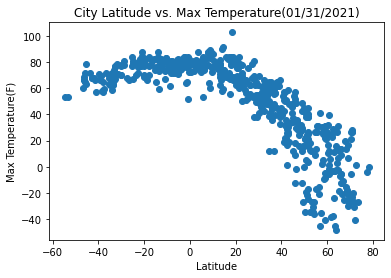

In [16]:
# Create a scatter plot to showcase the relationship stated above
latitude = weather_df["Lat"]
temp = weather_df["Max Temp"]

plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title("City Latitude vs. Max Temperature(01/31/2021)")
plt.scatter(latitude,temp)
plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

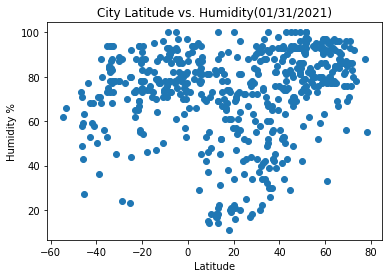

In [17]:
# Create a scatter plot to showcase the relationship stated above
latitude = weather_df["Lat"]
humidity = weather_df["Humidity"]

plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs. Humidity(01/31/2021)")
plt.scatter(latitude,humidity)
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

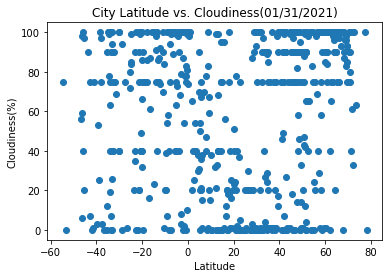

In [18]:
# Create a scatter plot to showcase the relationship stated above 
latitude = weather_df["Lat"]
cloudiness = weather_df["Cloudiness"]

plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness(01/31/2021)")
plt.scatter(latitude,cloudiness)
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

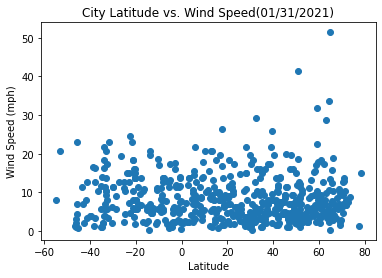

In [20]:
# Create a scatter plot to showcase the relationship stated above 
latitude = weather_df["Lat"]
wind_speed = weather_df["Wind Speed"]

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed(01/31/2021)")
plt.scatter(latitude,wind_speed)
plt.show

## Linear Regression

In [66]:
# Create a data frame needed for the following linear regression plots

# Northern hemisphere data frame
northern_df = weather_df.loc[(weather_df["Lat"] > 0)].dropna()

# Southern hemisphere data frame
southern_df = weather_df.loc[(weather_df["Lat"] < 0)].dropna()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:  -0.8542505604524409


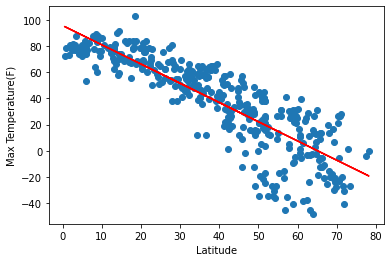

In [98]:
# Create a scatter plot with a linear regression to showcase the relationship stated above 
n_latitude = northern_df["Lat"]
n_temp = northern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitude,n_temp)
# Create equation of line to calculate predicted max temp
n_temp_vs_lat = n_latitude*slope + intercept

print("The r-value is: ",rvalue)

plt.plot(n_latitude,n_temp_vs_lat,"r")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
# plt.title("City Latitude vs. Max Temperature(01/31/2021)")
plt.scatter(n_latitude,n_temp)
# plt.show

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:  0.5519848875447301


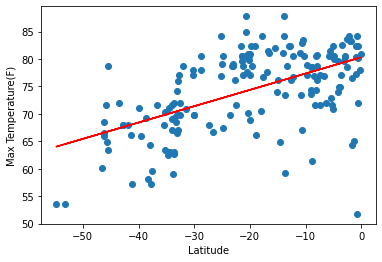

In [99]:
# Create a scatter plot with a  linear regression to showcase the relationship stated above 
s_latitude = southern_df["Lat"]
s_temp = southern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitude,s_temp)
# Create equation of line to calculate predicted max temp
s_temp_vs_lat = s_latitude*slope + intercept

print("The r-value is: ",rvalue)

plt.plot(s_latitude,s_temp_vs_lat,"r")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.scatter(s_latitude,s_temp)
# plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:  0.3853140218352776


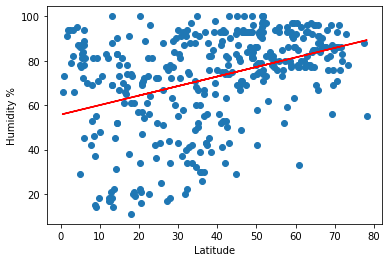

In [100]:
# Create a scatter plot with a  linear regression to showcase the relationship stated above 
n_latitude = northern_df["Lat"]
n_humidity = northern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitude,n_humidity)
# Create equation of line to calculate predicted max temp
n_humidity_vs_lat = n_latitude*slope + intercept

print("The r-value is: ",rvalue)

plt.plot(n_latitude,n_humidity_vs_lat,"r")

plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.scatter(n_latitude,n_humidity)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:  0.323793558179445


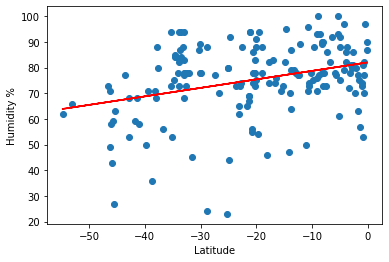

In [101]:
# Create a scatter plot with a  linear regression to showcase the relationship stated above 
s_latitude = southern_df["Lat"]
s_humidity = southern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitude,s_humidity)
# Create equation of line to calculate predicted max temp
s_humidity_vs_lat = s_latitude*slope + intercept


print("The r-value is: ",rvalue)

plt.plot(s_latitude,s_humidity_vs_lat,"r")

plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.scatter(s_latitude,s_humidity)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:  0.41673044768427714


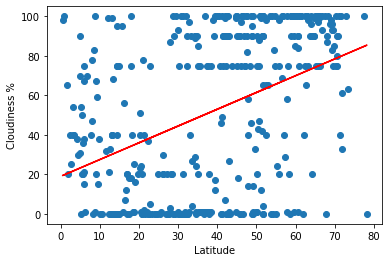

In [102]:
# Create a scatter plot with a  linear regression to showcase the relationship stated above 
n_latitude = northern_df["Lat"]
n_cloudiness = northern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitude,n_cloudiness)
# Create equation of line to calculate predicted max temp
n_cloudiness_vs_lat = n_latitude*slope + intercept

print("The r-value is: ",rvalue)

plt.plot(n_latitude,n_cloudiness_vs_lat,"r")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.scatter(n_latitude,n_cloudiness)


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:  0.1710923670061434


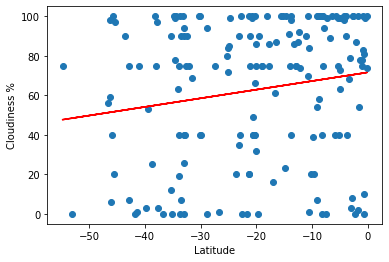

In [103]:
# Create a scatter plot with a  linear regression to showcase the relationship stated above 
s_latitude = southern_df["Lat"]
s_cloudiness = southern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitude,s_cloudiness)
# Create equation of line to calculate predicted max temp
s_cloudiness_vs_lat = s_latitude*slope + intercept

print("The r-value is: ",rvalue)

plt.plot(s_latitude,s_cloudiness_vs_lat,"r")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.scatter(s_latitude,s_cloudiness)


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:  0.011522607430777435


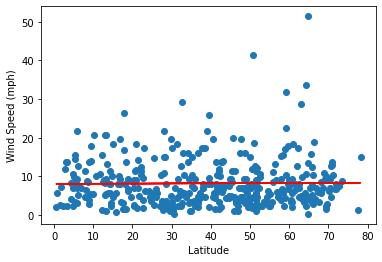

In [104]:
# Create a scatter plot with a  linear regression to showcase the relationship stated above 
n_latitude = northern_df["Lat"]
n_wind = northern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitude,n_wind)
# Create equation of line to calculate predicted max temp
n_wind_vs_lat = n_latitude*slope + intercept

print("The r-value is: ",rvalue)

plt.plot(n_latitude,n_wind_vs_lat,"r")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(n_latitude,n_wind)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:  -0.06902683985211358


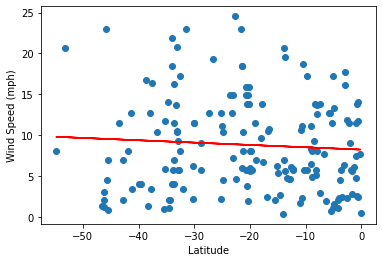

In [97]:
# Create a scatter plot with a  linear regression to showcase the relationship stated above 
s_latitude = southern_df["Lat"]
s_wind = southern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitude,s_wind)
# Create equation of line to calculate predicted max temp
s_wind_vs_lat = s_latitude*slope + intercept


print("The r-value is: ",rvalue)
plt.plot(s_latitude,s_wind_vs_lat,"r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(s_latitude,s_wind)